In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

## Random Forest

Let's go back to the home price data we were looking at:

In [2]:
df = pd.read_csv("C:/Users/jhtchns2/Downloads/houseprices/Cleaned train.csv")

df

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.000000,...,0,0,1,0,0,0,0,1,0,208501.0
1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.000000,...,0,0,1,0,0,0,0,1,0,181501.0
2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.000000,...,0,0,1,0,0,0,0,1,0,223501.0
3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.000000,...,0,0,1,1,0,0,0,0,0,140001.0
4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.000000,...,0,0,1,0,0,0,0,1,0,250001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,17.611139,13.688829,6,3.991517,1999,2000,54.598150,665.141633,0.000000,...,0,0,1,0,0,0,0,1,0,175001.0
1454,1455,21.472480,14.838658,6,4.679501,1978,1988,15.342608,156.123103,8.046409,...,0,0,1,0,0,0,0,1,0,210001.0
1455,1456,18.320139,13.983828,7,6.637669,1941,2006,54.598150,73.494065,0.000000,...,0,0,1,0,0,0,0,1,0,266501.0
1456,1457,18.668047,14.145129,5,4.679501,1950,1996,54.598150,21.007316,13.087759,...,0,0,1,0,0,0,0,1,0,142126.0


I'll use a reduced number of features from our LASSO example:

In [3]:
features = ['LotArea', 'OverallQual', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
               'Fireplaces', 'GarageArea', 'Total_Home_Quality', 'TotalSF',
               'YrBltAndRemod', 'Total_Bathrooms', 'GarageCars_log_sq',
               'Neighborhood_NoRidge', 'ExterQual_Ex', 'ExterQual_TA', 'BsmtQual_Ex',
               'BsmtExposure_Gd', 'KitchenQual_Ex']

In [4]:
X = df[features]

y = df[['Saleprice']]

Now let's specify a smallish grid to search over:

In [5]:
number_trees = np.arange(200,2000,20)
max_depth = np.arange(10,110,10)
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': number_trees,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': [True,False]}

Now I'll instantiate a new model object:

In [6]:
rf = RandomForestRegressor()

While we could still use `GridSearch`, I'll use `RandomizedSearchCV` which will do it faster (since it does it randomly) at the expense of possibly not landing on the global min.

In [7]:
rf_random = RandomizedSearchCV(rf,random_grid,n_iter=20,n_jobs=-1,random_state=40)

rf_random.fit(X,y)

C:\Users\jhtchns2\.conda\envs\ace592\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': array([ 200,  220,  240,  260,  280,  300,  320,  340,  360,  380,  400,
        420,  440,  460,  480,  500,  520,  540,  560,  580,  600,  620,
        640,  660,  680,  700,  720,  740,  760,  780,  800,  820,  840,
        860,  880,  900,  920,  940,  960,  980, 1000, 1020, 1040, 1060,
       1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280,
       1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500,
       1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720,
       1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940,
       1960, 1980])},
           

In [16]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_leaf': 1,
 'max_depth': 40,
 'bootstrap': True}

Now let's see how it looks:

In [9]:
df['y_hat'] = rf_random.predict(X)

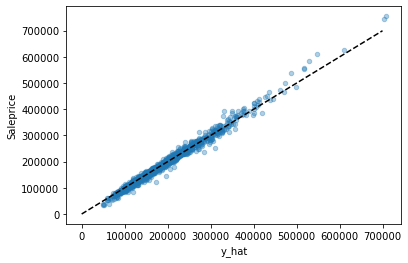

In [10]:
df[['Saleprice','y_hat']].plot(kind='scatter',y="Saleprice",x='y_hat',alpha=.35)
plt.plot(np.linspace(0,700000,10),np.linspace(0,700000,10),color="black",ls="--")

In [19]:
((df['Saleprice']-df['y_hat'])**2).mean()**.5

9525.75157376402

Where is it predicting the worst?

Is this good or bad?

Let's look at some test data:

In [12]:
test = pd.read_csv("C:/Users/jhtchns2/Downloads/houseprices/Cleaned test.csv")

In [13]:
X_test = test[features].values

In [14]:
test['sale_price_pred'] = rf_random.predict(X_test)

<AxesSubplot:ylabel='Frequency'>

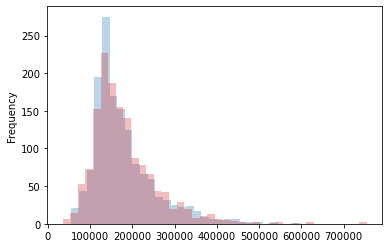

In [15]:
test.sale_price_pred.plot(kind="hist",bins=30,alpha=.3)
df['Saleprice'].plot(kind="hist",bins=40,color='C3',alpha=.3)

Luckily, they look quite similar.

In [17]:
test[['sale_price_pred']].to_csv("rf_prices.csv",index=False)